### Classification on Fashion MNIST Dataset
This guide trains a neural network model to classify images of clothing, like sneakers and shirts.

#### Import necessary libraries

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


#### Import Dataset

The Fashion MNSIT Dataset comes pre loaded within the Keras Library

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
type(train_images)

numpy.ndarray

### Explore Dataset

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [31]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [6]:
len(train_labels)

60000

Each label is an integer between 0 and 9:

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [8]:
len(test_images)

10000

Test set contains 10,000 examples

### Preprocess Data

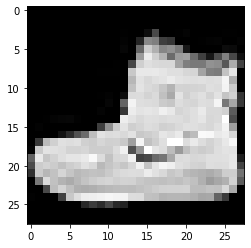

In [12]:
plt.imshow(train_images[0], cmap = 'gray')

In [10]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [17]:
train_images[0].max(), train_images[0].min()

(255, 0)

We need to convert this into an output from 0 - 1

In [18]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [19]:
train_images[0].max(), train_images[0].min()

(1.0, 0.0)

### Build model

Building the neural network requires configuring the layers of the model, then compiling the model.

Most of deep learning consists of chaining together simple layers. Most layers, such as Dense Layers, have parameters that are learned during training.

In [21]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

In [23]:
# How your model looks
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


#### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* *Optimizer* —This is how the model is updated based on the data it sees and its loss function.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Train the model
Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.


In [24]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.5017 - accuracy: 0.8234
Epoch 2/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.3762 - accuracy: 0.8647
Epoch 3/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.3382 - accuracy: 0.8769
Epoch 4/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.3135 - accuracy: 0.8845
Epoch 5/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.2962 - accuracy: 0.8905
Epoch 6/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2810 - accuracy: 0.8956
Epoch 7/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2684 - accuracy: 0.9008
Epoch 8/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2567 - accuracy: 0.9043
Epoch 9/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.2478 - accuracy: 0.9067
Epoch 10/10
60

### Evaluate Accuracy
Your model has finished training on the training data. Let's see how it performs on data it has never seen.

In [25]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3351 - accuracy: 0.8843

Test accuracy: 0.8843


### Use Trained Model
You can now use the trained model to make predictions

In [26]:
predictions = model.predict(test_images)

In [27]:
predictions.shape

(10000, 10)

In [28]:
predictions[4]

array([  4.58601   ,  -7.4991364 ,   1.6527473 ,  -0.49351904,
         0.17289543, -10.961599  ,   4.979293  , -19.793774  ,
        -4.40787   , -15.127864  ], dtype=float32)

In [30]:
predictions[4].argmax()

6

In [32]:
class_names[6]

'Shirt'

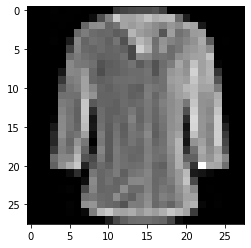

In [34]:
plt.imshow(test_images[4], cmap = 'gray')